### Basic Project Plan
Here's an outline of your project plan:

- Task: Collect and analyze weather data across cities worldwide.
- Purpose: PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.
- Method: Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

Your analysis of the data will be split into three main parts, or stages.

1. Collect the Data

- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
- Use the citipy module to list the nearest city to the latitudes and longitudes.
- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
- Parse the JSON data from the API request.
- Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

2. Exploratory Analysis with Visualization

- Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed
- Determine the correlations for the following weather data:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed
- Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

3. Visualize Travel Data

Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:

1. Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
2. Create a heatmap for the new DataFrame.
3. Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.
4. Store the name of the first hotel in the DataFrame.
5. Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### create a for loop that will do the following:

1. Iterate through the `coordinates`' zipped tuple.
2. Use `citipy.nearest_city()` and inside the parentheses of `nearest_city()`, add the latitude and longitude in this format: `coordinate[0], coordinate[1]`.
3. To print the `city name`, chain the `city_name` to the `nearest_city()` function.
4. To print the `country name`, chain the `country_code` to the `nearest_city()` function.

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

# Pseudocode outline

## Retrieving the weather data from 500+ cities.

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the `city_url` or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | mawlaik
Processing Record 8 of Set 1 | darhan
Processing Record 9 of Set 1 | dori
Processing Record 10 of Set 1 | oranjemund
Processing Record 11 of Set 1 | bombay
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | kasama
Processing Record 16 of Set 1 | kieta
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proces

Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | belaya gora
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | labuhan
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | vredendal
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | salta
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | bandarbeyla
Processing Record 9 of Set 5 | ontario
Processing Record 10 of Set 5 | eenhana
Processing Record 11 of Set 5 | cherskiy
Processing Record 12 of Set 5 | fort frances
Processing Record 13 of Set

Processing Record 32 of Set 8 | muyezerskiy
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | santa vitoria do palmar
Processing Record 36 of Set 8 | ovalle
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | simao
Processing Record 39 of Set 8 | nueve de julio
Processing Record 40 of Set 8 | laiyang
Processing Record 41 of Set 8 | puteyets
Processing Record 42 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 43 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 44 of Set 8 | havoysund
Processing Record 45 of Set 8 | roseburg
Processing Record 46 of Set 8 | cedar city
Processing Record 47 of Set 8 | santa cruz cabralia
Processing Record 48 of Set 8 | palana
Processing Record 49 of Set 8 | tres arroyos
Processing Record 50 of Set 8 | lethem
Processing Record 1 of Set 9 | lakes entrance
Processing Record 2 of Set 9 | abrau-dyurso
Processing Record 3 of Set 9 | raxau

Processing Record 14 of Set 12 | muroto
Processing Record 15 of Set 12 | tura
Processing Record 16 of Set 12 | edwardsville
Processing Record 17 of Set 12 | skreia
Processing Record 18 of Set 12 | gull lake
Processing Record 19 of Set 12 | carire
Processing Record 20 of Set 12 | doha
Processing Record 21 of Set 12 | palestina
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | manoel urbano
Processing Record 24 of Set 12 | chistogorskiy
Processing Record 25 of Set 12 | lasa
Processing Record 26 of Set 12 | itabira
Processing Record 27 of Set 12 | rongcheng
Processing Record 28 of Set 12 | nadvoitsy
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | aswan
Processing Record 31 of Set 12 | waslala
Processing Record 32 of Set 12 | kalmunai
Processing Record 33 of Set 12 | delijan
Processing Record 34 of Set 12 | catamarca
Processing Record 35 of Set 12 | soyo
Processing Record 36 of Set 12 | san lazaro
Processing Record 37 of Set 12 | ginir
Pro

### Let's break down the above code so we understand fully before continuing:

- We create the `for` loop with the `enumerate()` method and reference the index and the city in the list.
- In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the `set_count` and the `record_count` are incremented by 1.
- Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, `city.replace(" ","+")`. This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
    - Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
- Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
- Then we add one to the record count before the next city is processed.


### Let's review the code:

- We parse the JSON file for the current city.
    - If there is no weather data for the city, i.e. , a `<Response [404]>` then there is no weather to retrieve and `City not found. Skipping...` is printed.
- If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
    - We could write a `try-except` block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
- We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
- Finally, below the `try` block and after the `except` block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your `except` block is indented and in line with the `try` block, and that the print statements are flush with the margin.
- Under the print statement in the `except` block, we add the `pass` statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.


In [9]:
# Print the city count to confirm sufficient count.
len(city_data)

577

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,17.60,79,75,8.05,US,2021-04-21 18:09:42
1,Punta Arenas,-53.1500,-70.9167,46.40,57,0,8.05,CL,2021-04-21 18:09:43
2,Arraial Do Cabo,-22.9661,-42.0278,78.80,78,40,14.97,BR,2021-04-21 18:09:43
3,Longyearbyen,78.2186,15.6401,24.80,68,75,11.50,SJ,2021-04-21 18:09:16
4,Clyde River,70.4692,-68.5914,10.40,92,75,11.50,CA,2021-04-21 18:08:00
5,Carnarvon,-24.8667,113.6333,68.00,83,76,8.05,AU,2021-04-21 18:09:44
6,Mawlaik,23.6333,94.4167,76.05,33,0,1.07,MM,2021-04-21 18:09:44
7,Darhan,49.4867,105.9228,28.47,56,66,16.89,MN,2021-04-21 18:09:45
8,Dori,14.0354,-0.0345,99.70,8,30,4.36,BF,2021-04-21 18:09:45
9,Oranjemund,-28.5500,16.4333,61.05,91,95,3.87,NA,2021-04-21 18:09:45


In [11]:
# Set new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Set dataframe to accept new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-04-21 18:09:42,71.2906,-156.7887,17.60,79,75,8.05
1,Punta Arenas,CL,2021-04-21 18:09:43,-53.1500,-70.9167,46.40,57,0,8.05
2,Arraial Do Cabo,BR,2021-04-21 18:09:43,-22.9661,-42.0278,78.80,78,40,14.97
3,Longyearbyen,SJ,2021-04-21 18:09:16,78.2186,15.6401,24.80,68,75,11.50
4,Clyde River,CA,2021-04-21 18:08:00,70.4692,-68.5914,10.40,92,75,11.50
5,Carnarvon,AU,2021-04-21 18:09:44,-24.8667,113.6333,68.00,83,76,8.05
6,Mawlaik,MM,2021-04-21 18:09:44,23.6333,94.4167,76.05,33,0,1.07
7,Darhan,MN,2021-04-21 18:09:45,49.4867,105.9228,28.47,56,66,16.89
8,Dori,BF,2021-04-21 18:09:45,14.0354,-0.0345,99.70,8,30,4.36
9,Oranjemund,NA,2021-04-21 18:09:45,-28.5500,16.4333,61.05,91,95,3.87


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Max temp vs Latitude scatter

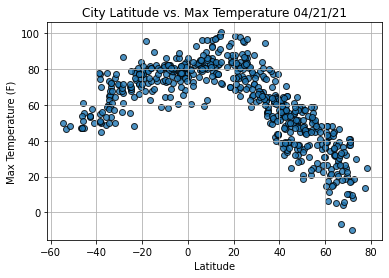

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Humidity vs Latitude scatter

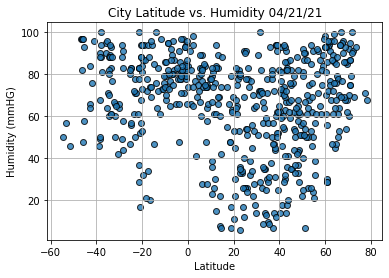

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (mmHG)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Cloudiness vs Latitude Scatter

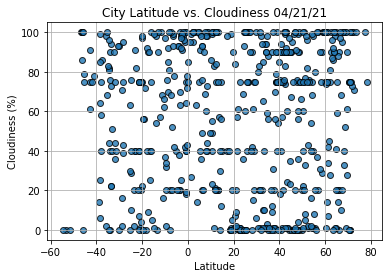

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Wind Speed vs Latitude Scatter

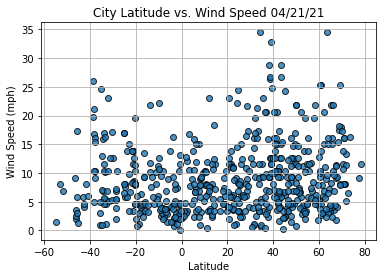

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

#### Perform linear regression.
`(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)`

#### Calculate the regression line "y values" from the slope and intercept.
`regress_values = x_values * slope + intercept`

#### Get the equation of the line.
`line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))`

#### Create a scatter plot of the x and y values.
`plt.scatter(x_values,y_values)`
#### Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
`plt.plot(x_values,regress_values,"r")`
#### Annotate the text for the line equation and add its coordinates.
`plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()`

We will reuse this code with minor changes for each weather parameter in each hemisphere. The variables for each graph are as follows:

1. The x values, the latitudes
2. The y values, each of the four weather parameters
3. The y label, the weather parameter being plotted
4. The x- and y-values given as a tuple, `(10,40)`, for the regression line equation to be placed on the scatter plot.


## Create a linear regression function (plot_liner_function) so we can call it and reuse going forward.

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

## Create Hemisphere Dataframes 

In [32]:
# Check the current df using loc function
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2021-04-21 18:08:24
Lat                      -33.5906
Lng                        26.891
Max Temp                    69.91
Humidity                       83
Cloudiness                     94
Wind Speed                   5.53
Name: 13, dtype: object

In [33]:
# Northern hemisphere has latitudes above 0 which we can ID the rows in the city_data_df by using loc function
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-04-21 18:09:42,71.2906,-156.7887,17.60,79,75,8.05
3,Longyearbyen,SJ,2021-04-21 18:09:16,78.2186,15.6401,24.80,68,75,11.50
4,Clyde River,CA,2021-04-21 18:08:00,70.4692,-68.5914,10.40,92,75,11.50
6,Mawlaik,MM,2021-04-21 18:09:44,23.6333,94.4167,76.05,33,0,1.07
7,Darhan,MN,2021-04-21 18:09:45,49.4867,105.9228,28.47,56,66,16.89


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [35]:
len(northern_hemi_df)

397

In [36]:
len(southern_hemi_df)

180

## Northern Hemisphere with regression line using `plot_linear_function`

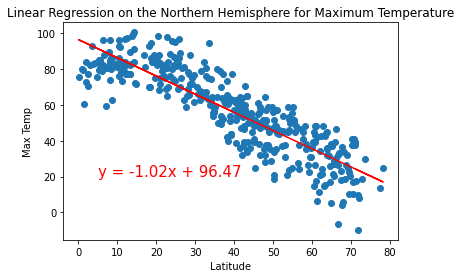

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,20))

## Southern Hemisphere with regression line using `plot_linear_regression`

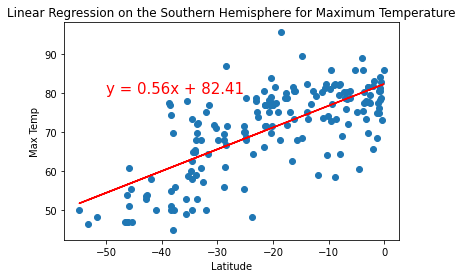

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

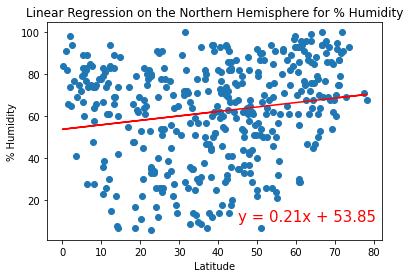

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(45,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

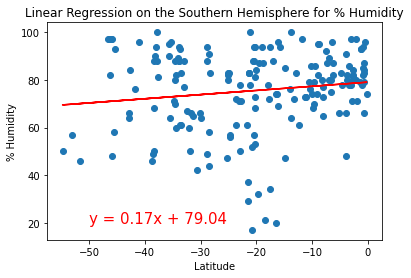

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,20))

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

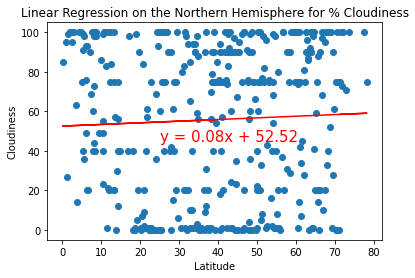

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       'Cloudiness',(25,45))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

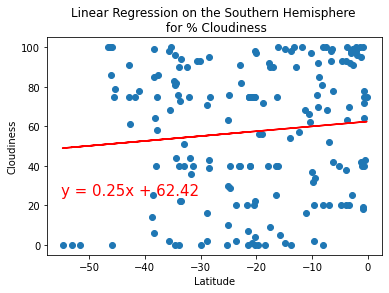

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-55,25))

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

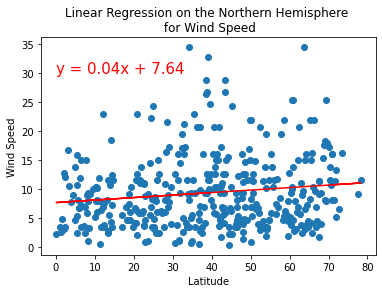

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

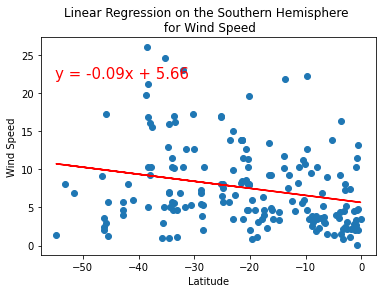

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,22))